# Plotting Enzyme Kinetics

In this workbook we will introduce simple *Python* commands for plotting enzyme kinetics.

The famous Michaelis-menten equation is...

$$ \nu = V_{max} \frac{[S]}{K_M + [S]} $$

It describes a hyperbolic curve and there is no curve fit available in the presets in Microsoft Excel or Google Sheets that describes this function. 

It can be written in linear form as the abominable Lineweaver-Burke equation...

$$ \frac{1}{\nu} = \frac{1}{V_{max}} + \frac{K_M}{V_{max}}\frac{1}{[S]} $$


Below we will plot a data set from problem 7.7 in the textbook. 

## IMPORTANT! Go to the end of this notebook and execute the final code block FIRST. 

The last block of code contains the definitions for the functions used in this document.



## Setting Up the Data

The code below creates assignments for variables states in the problem and makes an array of the experimental data.


In [61]:
########################
## Problem 7.7
########################


#######################
## Facts from problem
#######################

mw_enzyme = 29600 ## g/mole 
g_enzyme = 1E-9   ## g  -  amount of enzyme added to tube
volume = 10       ## mL -  volume of solution
time = 1          ## min. - time period at observation

### Table of concentration of penicillin (substrate) and amount consumed after time period

###      Conc (uM), nanomoles
data = [[1,         0.11],
        [3,         0.25],
        [5,         0.34],
        [10,        0.45],
        [30,        0.58],
        [50,        0.61]]


##########################################################
### Calculate the rates of reaction from the data.
##########################################################

data = np.array(data)   ### Convert the above list of lists to a 2D array.

### Collect concentrations and amount reacted data as two separate arrays

conc_penicillin = data[:,0]   ### uM     - all rows, column 0
amount_hydrolyzed = data[:,1] ### nmoles - all rows, column 1

### rate = nanomoles / (mL * 1L/1000mL) / (minutes *  60 seconds/minute)
rate = amount_hydrolyzed / (volume * (1/1000)) / (time * 60/1)              ## nanomoles/L/second




## A Simple Plot

We now have a set of x and y data. We know what x and y are because we can examine the code and see (x is the substrate concentration, y is the rate of the enzyme-catalyzed reaction.)

Plotting is easy in *Python*. We will use the *MatPlotLib* package. It is a very powerful plotting tool. Within it is the *MatPlotLib.PyPlot* sublibrary, which provides tools that are simple to use for plotting. 

The code below will plot the x,y data we established above.

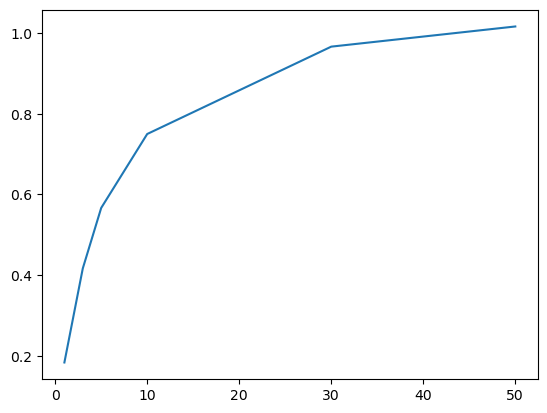

In [62]:
from matplotlib import pyplot as plt    ## import the tools of MatPlotLib.PyPlot but use a shorter name

x = conc_penicillin
y = rate

plt.plot(x,y)

## Plotting the Data

Perhaps the above plot is a little too basic? We could add some style using commands built into the *MatPlotLib.PyPlot* system. Remember we have named *PyPlot* as "*plt*" in the code below (see the very first two lines of code in the block above)

### A Michaelis-Menten Plot
Below is code to plot the x,y data. You can use this code top plot any x,y data. Just steal it and change it to suit you. The first command resets all the defaults so that any changes you make are starting from the same place every time.

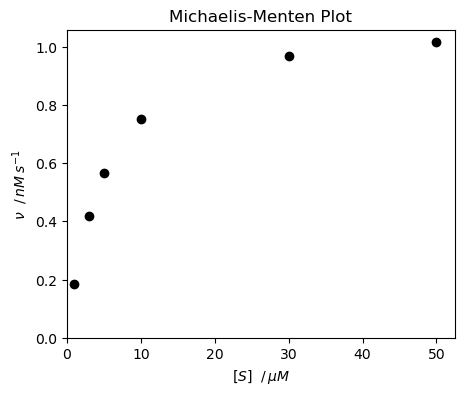

In [63]:
#################################
### Call a function that will make an x,y plot and add axis labels for the MM plot
#################################

x = conc_penicillin
y = rate

MM_Make_Plot(x,y)

### A Double Reciprocol Plot

We can plot the Lineweaver-Burke plot by taking the reciprocals of our data and just steal the code as above. I changed style details (title, axis labels, axis ranges)

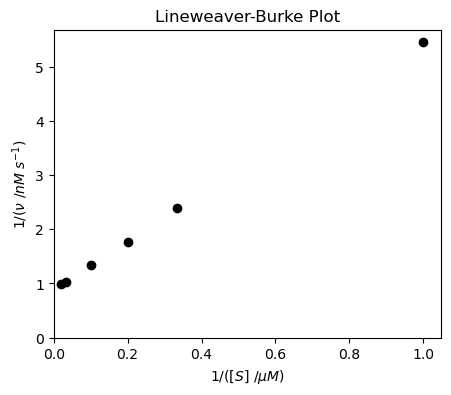

In [64]:
#################################
### Call a function that will make an x,y plot and add axis labels for the LB plot
#################################

x = conc_penicillin
y = rate

LB_Make_Plot(x,y)

## Linear Curve Fitting

Various *Python* tools can perform least squares fits to a given function. There are many ways to do this. We will consider only one way. We will use the tools in the *SciPy* package.

*SciPy* is a library of tools for scientific computing. One set of tools is the *SciPy.Optimize* sublibrary. It provides many tools for statistical analysis of data. We will be using the *SciPy.Optimize.Curve_Fit* function. 

First we must define a function to which we will fit a set of x,y data. Then we can send that function and the x,y sata to the *Curve_Fit* function. We will get back two data objects. One will be the best values of the parameters (e.g. slope and intercept) and the other is a set of statistical information.

### Define Functions
In the code below I will define two functions. A linear function, with slope and intercept, and a function that describes the Michaelis-Menten model, with $V_{max}$ and $K_M$.

In [6]:
####################################
### define a linear function
####################################

def linear(x, slope, intercept):  ### Take x values, slope and intercept and return the y values
    y = slope * x + intercept
    return(y)

####################################
### define a Michaelis-Menten function
####################################

def MMplot(S, Vmax, KM):
    v = Vmax * S / (S + KM)
    return(v)

### Perform Linear Curve Fit

The code below will fit the Lineweaver-Burke double reciprocol plot data to a linear function. We will then get the parameters for the lone and the standard error calculated by the *SciPy.optimize.curve_fit* function.

In [7]:

####################################
### Perform the linear curve fit
####################################

x = 1 / conc_penicillin
y = 1 / rate

### linear(x,slope, intercept) returns y
params, stats = curve_fit(linear, x, y)   ## two objects are returned

####################################
### Interpret the results
####################################

slope, intercept = params   ### pull out the two values in the params object

perr = np.sqrt(np.diag(stats))        ### convert covariance matrix to stdev values
stdev_slope, stdev_intercept = perr   ### pull out the two stdev values 

print(f"The slope is {slope:0.3f} +/- {stdev_slope:0.3f}")
print(f"The intercept is {intercept:0.3f} +/- {stdev_intercept:0.3f}")
print()

####################################
### if "True", print the two objects that are returned for informational purposes
####################################

if False:     ### can be 'True' or 'False'
    print_stats(params, stats)




The slope is 4.574 +/- 0.019
The intercept is 0.876 +/- 0.008


### Handling Uncertainties

The curve fit function estimated the error in your data based on the scatter from the line of the curve fit. But $K_M$ and $V_{max}$ are reciprocals of these values. How do you handle error propagation in reciprocals? I don't know either, but *Python* can import tools that do.

We will need to install the *Uncertainties* package, which is not part of the standard library. In Colab you will need to run the final block in this workbook BEFORE running any other code. You will find the code to install and set up the *Uncertainties* packagae at the top of that last block.

We can now use the tools in the *Uncertainties* package to handle all our error propagation. First we will take the values for the parameters and their standard deviations and create combine objects that include both the value and the uncertainties. 

The code below will create values that include uncertainties using the *Uncertainties.ufloat* function. It creates a special kind of floating point number that includes the value and its uncertainty. Then we can calculate the values for $V_{max}$ and $K_M$ while also propagating the error. 

*Note: There are several competing ideas of how to correctly propagate error (although I must admit they all agree at the simple level of arithmatic). How can we document the methods we used? We just show code where we are using the* Uncertainties *package and the tools it contains. Then everyone will know what we did.*

In [65]:
###################################
### Example of using the tools of the Uncertainties package
###################################

slope_u = un.ufloat(slope,stdev_slope)               ## create a value with uncertainty built in
intercept_u = un.ufloat(intercept,stdev_intercept)  

print(f"The slope is {slope_u:0.3f}")                ## Observe that the single variable now combines the value and the uncertainty
print(f"The intercept is {intercept_u:0.3f}")
print()

v_max = 1 / intercept_u
KM = v_max * slope_u

print(f"The Vmax is {v_max:0.3f} uM/s")              ## Observe that the single variable now combines the value and the uncertainty
print(f"The KM is {KM:0.3f} mM")

if False:
    ###################################
    ### Note: We can put back out the value and the error into separate numbers as so...
    ###################################
    
    value = unp.nominal_values(v_max)
    stdev = unp.std_devs(v_max)
    
    print()
    print(f"We can separate the uncertain value into its nominal value and its stderr")
    print(f"The nominal value for Vmax is {value:0.3f}")
    print(f"The stderr for Vmax is {stdev:0.3f}")

###################################
### Record the results for later use in this workbook
###################################

true_slope = 4.57        ### Results of LB curve fit
true_intercept = 0.88



The slope is 4.574+/-0.019
The intercept is 0.876+/-0.008

The Vmax is 1.141+/-0.011 uM/s
The KM is 5.220+/-0.054 mM


### Include the Curve Fit in the Plot

Let us now add the line that represents the curve fit to the plot.  We will steal the code for plotting the data and then add a plot of the line created using the parameters from the *curve_fit* function results. The code below will repeat the data plot and add the extra line.

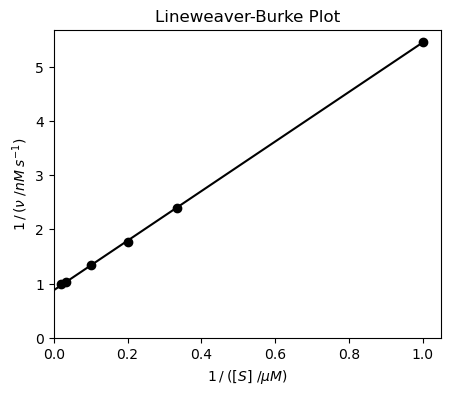

In [66]:
x = conc_penicillin
y = rate

Make_LB_Plot_With_Line(x,y)


## Curve Fit the MM Data

We will now steal the code above and reuse it. We will change the function that we feed to the *curve_fit* tool to the MMplot() function we defined for the Michaelis-Menten model. We will also make some other changes as needed. For example, this function uses $V_{max}$ and $K_M$ directly and we will not need to do any extra math. And we must use the original data, not the reciprocal data. 

The code below will make a Michaelis-Menten plot of the data, curve fit it to the MMfit function that describes the model, report the parameters along with their stderr values and plot the curve using the parameteds determines in the curve fit. Everything we did above 

The Vmax is 1.123+/-0.005
The KM is 5.002+/-0.079



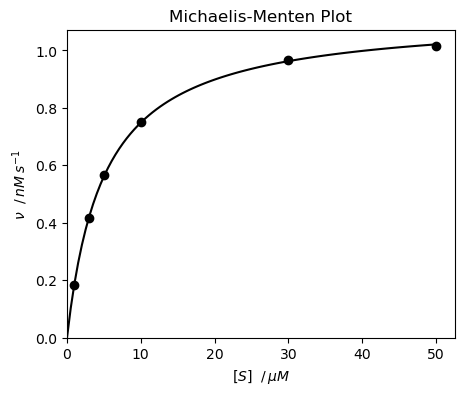

In [67]:
####################################
### Perform the curve fit
####################################

x = conc_penicillin
y = rate

params, stats = curve_fit(MMplot, x, y)   ## two objects are returned

####################################
### Interpret the results
####################################

v_max, KM = params   ### pull out the two values in the params object
perr = np.sqrt(np.diag(stats))        ### convert covariance matrix to stdev values
stdev_v_max, stdev_KM = perr          ### pull out the two stdev values 

v_max_u = un.ufloat(v_max,stdev_v_max)        ## create a value with uncertainty built in
KM_u = un.ufloat(KM,stdev_KM)  

print(f"The Vmax is {v_max_u:0.3f}")          ## Observe that the single variable now combines the value and the uncertainty
print(f"The KM is {KM_u:0.3f}")
print()

####################################
### Present the plot with the curve fit line
####################################

Make_MM_Plot_With_Line(x,y)

####################################
### Record the results for later
####################################

true_v_max = 1.123   ### Results of MM curve fit
true_KM = 5.002


## The Abomination of LB

The Lineweaver-Burke plot is a statistician's nightmare. In the above exercise we determined the $V_{max}$ and $K_M$ for the enzyme/substrate pair presented in the problem given. Let us take the exact same data and apply a slight error to the measured rate of the catalyzed reaction. Every time you run the code in the blocks below you will get a new role of the dice. How often does the Lineweaver-Burke plot come close to the values reported above compared to the curve fit of the Michaelis-Menten data.

You can change the magnitude of the error by editing the code. Have some fun.

### Random Error in MM Plots

The code below will apply an amount of random error to the data in the problem and then I will steal all the code for the MM curve fit and plot from above and use it again. 

In [68]:
#####################################
### Set up Random Number Generator
#####################################

np.random.seed(228673)   ### We want to seed the generator. Only run this once. 
                         ### If we repeat the seed ahrad of calling the generator we 
                         ### will start of with the same series of random numbers. 
                         ### Computers are never random. they are 'pseudo random'.
                         ### That is why the lottery still uses a drum of bouncing balls.

### create blank lists to store our random results 
list_MM_Vmax = []
list_MM_KM = []
list_LB_Vmax = []
list_LB_KM = []


The Vmax is 1.114+/-0.058
The KM is 5.734+/-0.976



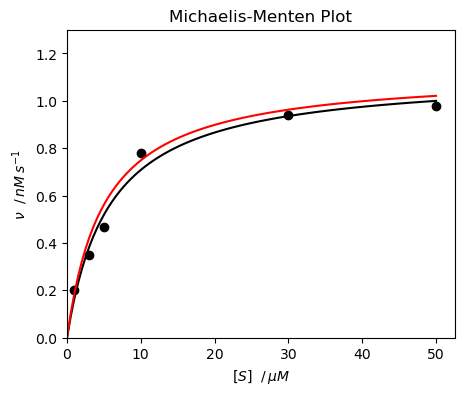

In [86]:
#####################################
### Explore Effect of Error
#####################################

x = conc_penicillin
y = rate

experimental_error = 0.05   ### error will be +/- this value

Make_MM_Plot_with_Error(x, y, experimental_error, 
                        list_MM_Vmax, list_MM_KM, 
                        true_v_max, true_KM)


### Random Error in LB Plots

The code below will apply an amount of random error to the data in the problem and then I will steal all the code for the LB linear fit and plot from above and use it again. 

The Vmax is 1.319+/-0.107 uM/s
The KM is 7.574+/-0.644 mM



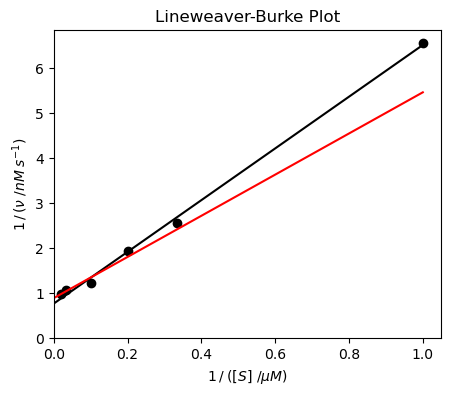

In [106]:
#####################################
### Explore Effect of Error
#####################################

x = conc_penicillin
y = rate

experimental_error = 0.05   ### error will be +/- this value

Make_LB_Plot_with_Error(x, y, experimental_error, 
                        list_LB_Vmax, list_LB_KM, 
                        true_slope, true_intercept)

## Summary of Results

We have been collecting the results of each execution of the code blocks above. Now we can get the average value and the standard deviation for the values we have observed in each plot. How do they compare?

In [107]:
#### Take the collected results and report mean and stdev 

print_lists = False  ### True or False   ### Are we printing the lists?

## round the results for neat printing.

### Summary of MM trials

if print_lists:            ### If we want to print the lists
    print(np.round(list_MM_Vmax,2))
    print(np.round(list_MM_KM,2))
    print()

print(f"MM Vmax  {un.ufloat(np.mean(list_MM_Vmax),np.std(list_MM_Vmax)):0.3f}")
print(f"MM KM    {un.ufloat(np.mean(list_MM_KM),np.std(list_MM_KM)):0.3f}")
print()

### Summary of LB trials

if False:                  ### If we need to remove an outlier
    list_LB_Vmax.pop(5)
    list_LB_KM.pop(5)

if print_lists:            ### If we want to print the lists
    print(np.round(list_LB_Vmax, 2))
    print(np.round(list_LB_KM, 2))
    print()

print(f"LB Vmax  {un.ufloat(np.mean(list_LB_Vmax),np.std(list_LB_Vmax)):0.3f}")
print(f"LB KM    {un.ufloat(np.mean(list_LB_KM),np.std(list_LB_KM)):0.3f}")
print()


MM Vmax  1.122+/-0.051
MM KM    5.166+/-0.668

LB Vmax  1.043+/-0.172
LB KM    4.293+/-1.784



## Other Linear Methods

There are two other common approaches to linearizing the Michaelis-Menten equation: The Eadie-Hofstee plot and the Hanes-Woolf plot.

### Eadie-Hofstee

The Eadie-Hofstee plot is...

$$ \nu = -K_M\frac{\nu}{[S]} + Vmax $$

So we will have a x-axis of $\nu / [S]$ and a y-axis of $\nu$. The y-intecept will be $V_{max}$ and the slope is the negative value of $K_M$.

Let us steal the code above and change it so that we are plotting the Eadie-Hofstee plot.


In [108]:
### create blank lists to store our random results 
list_EH_Vmax = []
list_EH_KM = []
list_HW_Vmax = []
list_HW_KM = []


The Vmax is 1.118+/-0.046 uM/s
The KM is 4.928+/-0.407 mM



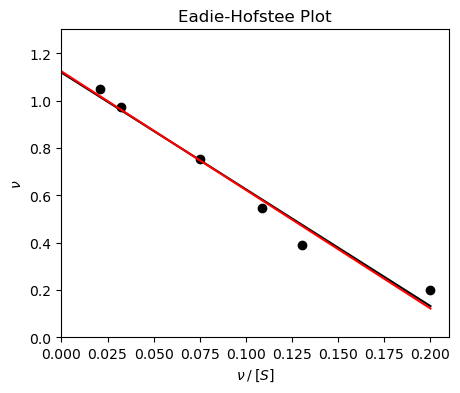

In [139]:
#####################################
### Explore Effect of Error
#####################################

x = conc_penicillin
y = rate

experimental_error = 0.05   ### error will be +/- this value

Make_EH_Plot_with_Error(x, y, experimental_error, 
                        list_EH_Vmax, list_EH_KM, 
                        true_v_max, true_KM)



### Hanes-Woolf

The Hanes-Woolf plot is...

$$ \frac{[S]}{\nu} = \frac{1}{V_{max}}[S] + \frac{K_M}{V_{max}} $$

So we will have a x-axis of $[S]$ and a y-axis of $[S]/ \nu$. The y-intecept will be $K_M / V_{max}$ and the slope is the negative value of $1 / V_{max}$.

Let us steal the code above and change it so that we are plotting the Hanes-Woolf plot.

The Vmax is 1.190+/-0.035 uM/s
The KM is 5.773+/-0.732 mM



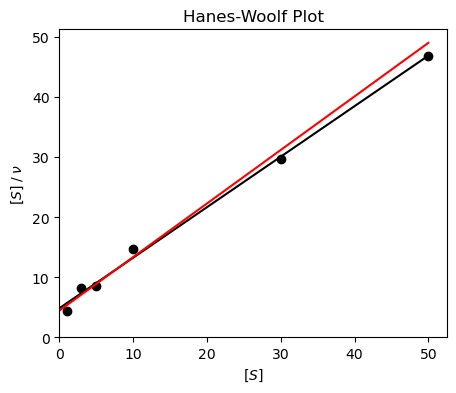

In [162]:
########################################################################
### Copied the code from above for the LB linear fit. Cut and paste is your friend.
########################################################################

#####################################
### Explore Effect of Error
#####################################

experimental_error = 0.05   ### error will be +/- this value

Make_HW_Plot_with_Error(x, y, experimental_error, 
                        list_HW_Vmax, list_HW_KM, 
                        true_v_max, true_KM)

## Summary of Results

We have been collecting the results of each execution of the code blocks above. Now we can get the average value and the standard deviation for the values we have observed in each plot. How do they compare?

In [164]:
#### Take the collected results and report mean and stdev 

print_lists = False  ### True or False   ### Are we printing the lists?

## round the results for neat printing.

### Summary of EH trials

if print_lists:            ### If we want to print the lists
    print(np.round(list_EH_Vmax,2))
    print(np.round(list_EH_KM,2))
    print()

print(f"EH Vmax  {un.ufloat(np.mean(list_EH_Vmax),np.std(list_EH_Vmax)):0.3f}")
print(f"EH KM    {un.ufloat(np.mean(list_EH_KM),np.std(list_EH_KM)):0.3f}")
print()

### Summary of HW trials

if print_lists:            ### If we want to print the lists
    print(np.round(list_HW_Vmax, 2))
    print(np.round(list_HW_KM, 2))
    print()

print(f"HW Vmax  {un.ufloat(np.mean(list_HW_Vmax),np.std(list_HW_Vmax)):0.3f}")
print(f"HW KM    {un.ufloat(np.mean(list_HW_KM),np.std(list_HW_KM)):0.3f}")
print()


EH Vmax  1.090+/-0.085
EH KM    4.824+/-1.141

HW Vmax  1.134+/-0.055
HW KM    5.485+/-1.157



## RUN THIS FIRST

Execute the final bock in this notebook below to establish all the functions and tools required in the code above.

In [59]:
from scipy.optimize import curve_fit
import numpy as np                       ## import the tools of NumPy but use a shorter name


####################################
### Install UNCERTAINTIES package 
####################################

#!pip install uncertainties  # to install in Colab. Add it back to avoid installing again and again.

####################################
### Import versions of NumPy and Math that use uncertainty 
####################################

import uncertainties as un
from uncertainties import unumpy as unp
from uncertainties import umath as um

def MM_Make_Plot(x,y):
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           ### Reset default style - no needed but just in case.
    plt.figure(figsize=(5,4))  ### establish a figure with size 5x4
    
    ######################
    ### Plot the data
    #####################
    
    plt.plot(x, y, "ko")      ### 'k' is black, 'o' is 'circles', '-' is solid line. 
                              ### Try "g.", "ko-", "ro--", "b^-"
    
    ######################
    ### Add some style
    ######################
    
    plt.ylim(0, None)         ### y-axis limits are min = 0, max = whatever
    plt.xlim(0, None)         ### x-axis limits are min = 0, max = whatever
    
    plt.ylabel(r"$\nu\ \ /\,nM\: s^{-1}$")   ### The $ indicates "math typesetting language"
    plt.xlabel(r"$[S]\ \ /\,\mu M$")
    plt.title("Michaelis-Menten Plot")
    
    ######################
    ### Display and export the plot
    ######################
    
    #plt.savefig("MM_plot.pdf")    ### Save the image as a pdf file. Now you can use it in a document.
    plt.show()
    
def LB_Make_Plot(x,y):
    ######################
    ### reciprocol calculations
    #####################
    
    x = 1/x
    y = 1/y
    
    ####################################################
    ### Steal code above and re-use it
    ####################################################
    
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           ### Reset default style - no needed but just in case.
    plt.figure(figsize=(5,4))  ### establish a figure with size 5x4
    
    ######################
    ### Plot the data
    #####################
    
    plt.plot(x, y, "ko")
    
    ######################
    ### Add some style
    #####################
    
    plt.ylim(0, None)
    plt.xlim(0, None)
    
    plt.ylabel(r"$\frac{1}{\nu\ /nM\; s^{-1}}$")
    plt.xlabel(r"$\frac{1}{[S]\ /\mu M}$")
    plt.ylabel(r"$1/(\nu\ /nM\; s^{-1})$")
    plt.xlabel(r"$1/([S]\ /\mu M)$")
    plt.title("Lineweaver-Burke Plot")
    
    ######################
    ### Display and export the plot
    #####################
    
    #plt.savefig("LB_plot.pdf")
    plt.show()

def Make_LB_Plot_With_Line(x,y):
    x = 1 / x
    y = 1 / y
    
    ### linear(x,slope, intercept) returns y
    params, stats = curve_fit(linear, x, y)   ## two objects are returned
    
    ####################################
    ### Interpret the results
    ####################################
    
    slope, intercept = params   ### pull out the two values in the params object
    
    ################################
    ### make a list of x values from zero to the end of the line
    ################################
    
    x_fit = np.linspace(0, np.max(x), 100)  ## 100 points from 0 to the highest value on LB plot x-axis
    
    ################################
    ### Feed that list into the function for the line fit
    ################################
    
    y_fit = linear(x_fit,slope,intercept)
    
    ################################
    ### Steal the plot code from above and add a line to plot the calculated line fit
    ################################
    
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           
    plt.figure(figsize=(5,4))  
    
    ######################
    ### Plot the data
    #####################
    
    plt.plot(x, y, "ko")
                                   ###########################
    plt.plot(x_fit, y_fit, "k-")   ### This is the extra line
                                   ###########################
    ######################
    ### Add some style
    #####################
    
    plt.ylim(0, None)
    plt.xlim(0, None)
    
    plt.ylabel(r"$1\,/\,(\nu\ /nM\; s^{-1})$")
    plt.xlabel(r"$1\,/\;([S]\ /\mu M)$")
    plt.title("Lineweaver-Burke Plot")
    
    ######################
    ### Display and export the plot
    #####################
    
    #plt.savefig("LB_plot.pdf")
    plt.show()

def Make_MM_Plot_With_Line(x,y):

    params, stats = curve_fit(MMplot, x, y)   ## two objects are returned

    ####################################
    ### Interpret the results
    ####################################
    
    v_max, KM = params   ### pull out the two values in the params object
    
    ################################
    ### make a list of x values from zero to the end of the line
    ################################
    
    x_fit = np.linspace(0, np.max(x), 100)  ## 100 points from 0 to the highest value on LB plot x-axis
    
    ################################
    ### Feed that list into the function for the line fit
    ################################
    
    y_fit = MMplot(x_fit,v_max,KM)
    
    ################################
    ### Steal the plot code from above and add a line to plot the calculated line fit
    ################################
    
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           
    plt.figure(figsize=(5,4))  
    
    ######################
    ### Plot the data and the curve fit line
    #####################
    
    plt.plot(x, y, "ko")
    plt.plot(x_fit, y_fit, "k-")   
                                   
    ######################
    ### Add some style
    #####################
    
    plt.ylim(0, None)
    plt.xlim(0, None)
    
    plt.ylabel(r"$\nu\ \ /\,nM\: s^{-1}$")   ### The $ indicates "math typesetting language"
    plt.xlabel(r"$[S]\ \ /\,\mu M$")
    plt.title("Michaelis-Menten Plot")
    
    ######################
    ### Display and export the plot
    #####################
    
    #plt.savefig("MM_plot.pdf")
    plt.show()

def Make_MM_Plot_with_Error(x, y, err, Vmax_list, KM_list, true_v_max, true_KM):
        
    ### We start with the x,y data entered at the top of this document
    ### Set an error range and then randomly add or subtract the error
    
    
    x2 = x   ## We want to copy the orginal data so that every time we rerun this
    y2 = y   ##  block of code we are starting agaion with the unchanged original data
    
    
    number_of_points = len(y2)
    random_values = np.random.randn(number_of_points) * err
    y2 = y2 + random_values
    
    ########################################################################
    ### Code for MM Plot from Above. Stolen and reused.
    ########################################################################
    
    ####################################
    ### Perform the curve fit
    ####################################
    
    params, stats = curve_fit(MMplot, x2, y2)   ## two objects are returned
    
    ####################################
    ### Interpret the results
    ####################################
    
    v_max, KM = params   ### pull out the two values in the params object
    
    perr = np.sqrt(np.diag(stats))        ### convert covariance matrix to stdev values
    stdev_v_max, stdev_KM = perr          ### pull out the two stdev values 
    
    v_max_u = un.ufloat(v_max,stdev_v_max)  ## create a value with uncertainty built in
    KM_u = un.ufloat(KM,stdev_KM)  
    
    print(f"The Vmax is {v_max_u:0.3f}")
    print(f"The KM is {KM_u:0.3f}")
    print()
    
    ######################################
    ### Collect results each time this code is run
    ######################################
    
    Vmax_list.append(v_max)
    KM_list.append(KM)
    
    ################################
    ### make a list of x values from zero to the end of the line
    ################################
    
    x_fit = np.linspace(0, np.max(x2), 100) 
    
    ################################
    ### Feed that list into the function for the line fit
    ################################
    
    y_fit = MMplot(x_fit,v_max,KM)
    
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           
    plt.figure(figsize=(5,4))  
    
    ######################
    ### Plot the data and the curve fit line
    #####################
    
    plt.plot(x2, y2, "ko")
    plt.plot(x_fit, y_fit, "k-")   
                                                               ######################################
    plt.plot(x_fit, MMplot(x_fit, true_v_max, true_KM), "r-")  ### Add in "ghost line" for original data
                                                               ######################################
    ######################
    ### Add some style
    #####################
    
    plt.ylim(0, 1.3)
    plt.xlim(0, None)
    
    plt.ylabel(r"$\nu\ \ /\,nM\: s^{-1}$")  
    plt.xlabel(r"$[S]\ \ /\,\mu M$")
    plt.title("Michaelis-Menten Plot")
    
    ######################
    ### Display and export the plot
    #####################
    
    #plt.savefig("MM_plot_err.pdf")
    plt.show()

def Make_LB_Plot_with_Error(x, y, err, Vmax_list, KM_list, true_slope, true_intercept):
    ### We start with the x,y data entered at the top of this document
    ### Set an error range and then randomly add or subtract the error
    
    x2 = x   ## We want to copy the orginal data so that every time we rerun this
    y2 = y   ##  block of code we are starting agaion with the unchanged original data    
    
    number_of_points = len(y)
    random_values = np.random.randn(number_of_points) * err
    y2 = y2 + random_values
    
    ########################################################################
    ### Code for MM Plot from Above. Stolen and reused.
    ########################################################################
    
    
    ####################################
    ### Perform the curve fit
    ####################################
    
    x2_lb = 1 / x2
    y2_lb = 1 / y2
    
    
    
    params, stats = curve_fit(linear, x2_lb, y2_lb)   ## two objects are returned
    
    ####################################
    ### Interpret the results
    ####################################
    
    slope, intercept = params   ### pull out the two values in the params object
    
    perr = np.sqrt(np.diag(stats))        ### convert covariance matrix to stdev values
    stdev_slope, stdev_intercept = perr   ### pull out the two stdev values 
    
    slope_u = un.ufloat(slope,stdev_slope)               ## create a value with uncertainty built in
    intercept_u = un.ufloat(intercept,stdev_intercept)  
    
    v_max = 1 / intercept_u
    KM = v_max * slope_u
    
    print(f"The Vmax is {v_max:0.3f} uM/s")         ## Observe that the single variable now combines the value and the uncertainty
    print(f"The KM is {KM:0.3f} mM")
    print()
    
    list_LB_Vmax.append(unp.nominal_values(v_max))
    list_LB_KM.append(unp.nominal_values(KM))
    
    
    ################################
    ### make a list of x values from zero to the end of the line
    ################################
    
    x_fit = np.linspace(0, np.max(x2_lb), 100)  ## 100 points from 0 to the highest value on LB plot x-axis
    
    ################################
    ### Feed that list into the function for the line fit
    ################################
    
    y_fit = linear(x_fit, slope, intercept)
    
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           
    plt.figure(figsize=(5,4))  
    
    ######################
    ### Plot the data and the curve fit line
    #####################
    
    plt.plot(x2_lb, y2_lb, "ko")
    plt.plot(x_fit, y_fit, "k-")   
                                                                      ######################################
    plt.plot(x_fit, linear(x_fit, true_slope, true_intercept), "r-")  ### Add in "ghost line" for original data
                                                                      ######################################
    ######################
    ### Add some style
    #####################
    
    plt.ylim(0, None)
    plt.xlim(0, None)
    
    plt.ylabel(r"$1\,/\,(\nu\ /nM\; s^{-1})$")
    plt.xlabel(r"$1\,/\;([S]\ /\mu M)$")
    plt.title("Lineweaver-Burke Plot")
    
    ######################
    ### Display and export the plot
    #####################
    
    #plt.savefig("LB_plot_err.pdf")
    plt.show()

def Make_EH_Plot_with_Error(x, y, err, Vmax_list, KM_list, true_v_max, true_KM):
    ### We start with the x,y data entered at the top of this document
    ### Set an error range and then randomly add or subtract the error
    
    experimental_error = 0.05   ### error will be +/- this value
    
    x2 = x   ## We want to copy the orginal data so that every time we rerun this
    y2 = y     ##  block of code we are starting agaion with the unchanged original data
    
    
    
    number_of_points = len(y)
    random_values = np.random.randn(number_of_points) * err
    y2 = y2 + random_values
    
    ########################################################################
    ### Code for MM Plot from Above. Stolen and reused.
    ########################################################################
    
    
    ####################################
    ### Perform the curve fit
    ####################################
    
    x2_eh = y2 / x2
    y2_eh = y2
    
    
    
    params, stats = curve_fit(linear, x2_eh, y2_eh)   ## two objects are returned
    
    ####################################
    ### Interpret the results
    ####################################
    
    slope, intercept = params   ### pull out the two values in the params object
    
    perr = np.sqrt(np.diag(stats))        ### convert covariance matrix to stdev values
    stdev_slope, stdev_intercept = perr   ### pull out the two stdev values 
    
    slope_u = un.ufloat(slope,stdev_slope)               ## create a value with uncertainty built in
    intercept_u = un.ufloat(intercept,stdev_intercept)  
    
    v_max = intercept_u
    KM = - slope_u
    
    print(f"The Vmax is {v_max:0.3f} uM/s")         ## Observe that the single variable now combines the value and the uncertainty
    print(f"The KM is {KM:0.3f} mM")
    print()
    
    list_EH_Vmax.append(unp.nominal_values(v_max))
    list_EH_KM.append(unp.nominal_values(KM))
    
    
    ################################
    ### make a list of x values from zero to the end of the line
    ################################
    
    x_fit = np.linspace(0, np.max(x2_eh), 100)  ## 100 points from 0 to the highest value on LB plot x-axis
    
    ################################
    ### Feed that list into the function for the line fit
    ################################
    
    y_fit = linear(x_fit, slope, intercept)
    
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           
    plt.figure(figsize=(5,4))  
    
    ######################
    ### Plot the data and the curve fit line
    #####################
    
    plt.plot(x2_eh, y2_eh, "ko")
    plt.plot(x_fit, y_fit, "k-")   
                                                                      ######################################
    plt.plot(x_fit, linear(x_fit, -true_KM, true_v_max), "r-")  ### Add in "ghost line" for original data
                                                                      ######################################
    ######################
    ### Add some style
    #####################
    
    plt.ylim(0, 1.3)
    plt.xlim(0, None)
    
    plt.ylabel(r"$\nu$")
    plt.xlabel(r"$\nu\,/\;[S]$")
    plt.title("Eadie-Hofstee Plot")
    
    ######################
    ### Display and export the plot
    #####################
    
    #plt.savefig("EH_plot_err.pdf")
    plt.show()

def Make_HW_Plot_with_Error(x, y, err, Vmax_list, KM_list, true_v_max, true_KM):
    ### We start with the x,y data entered at the top of this document
    ### Set an error range and then randomly add or subtract the error
    
    
    x2 = x   ## We want to copy the orginal data so that every time we rerun this
    y2 = y     ##  block of code we are starting agaion with the unchanged original data
    
    true_v_max = 1.123   ### Results of MM curve fit
    true_KM = 5.002
    
    
    number_of_points = len(y)
    random_values = np.random.randn(number_of_points) * err
    y2 = y2 + random_values
    
    ########################################################################
    ### Code for MM Plot from Above. Stolen and reused.
    ########################################################################
    
    
    ####################################
    ### Perform the curve fit
    ####################################
    
    x2_hw = x2
    y2_hw = x2 / y2
    
    
    
    params, stats = curve_fit(linear, x2_hw, y2_hw)   ## two objects are returned
    
    ####################################
    ### Interpret the results
    ####################################
    
    slope, intercept = params   ### pull out the two values in the params object
    
    perr = np.sqrt(np.diag(stats))        ### convert covariance matrix to stdev values
    stdev_slope, stdev_intercept = perr   ### pull out the two stdev values 
    
    slope_u = un.ufloat(slope,stdev_slope)               ## create a value with uncertainty built in
    intercept_u = un.ufloat(intercept,stdev_intercept)  
    
    v_max = 1 / slope_u
    KM = intercept_u / slope_u
    
    print(f"The Vmax is {v_max:0.3f} uM/s")         ## Observe that the single variable now combines the value and the uncertainty
    print(f"The KM is {KM:0.3f} mM")
    print()
    
    list_HW_Vmax.append(unp.nominal_values(v_max))
    list_HW_KM.append(unp.nominal_values(KM))
    
    
    ################################
    ### make a list of x values from zero to the end of the line
    ################################
    
    x_fit = np.linspace(0, np.max(x2_hw), 100)  ## 100 points from 0 to the highest value on LB plot x-axis
    
    ################################
    ### Feed that list into the function for the line fit
    ################################
    
    y_fit = linear(x_fit, slope, intercept)
    
    ######################
    ### Create an empty plot
    #####################
    
    plt.rcdefaults()           
    plt.figure(figsize=(5,4))  
    
    ######################
    ### Plot the data and the curve fit line
    #####################
    
    plt.plot(x2_hw, y2_hw, "ko")
    plt.plot(x_fit, y_fit, "k-")   
                                                                      ######################################
    plt.plot(x_fit, linear(x_fit, 1/true_v_max, true_KM/true_v_max), "r-")  ### Add in "ghost line" for original data
                                                                      ######################################
    ######################
    ### Add some style
    #####################
    
    plt.ylim(0, None)
    plt.xlim(0, None)
    
    plt.ylabel(r"$[S] \; / \; \nu$")
    plt.xlabel(r"$[S]$")
    plt.title("Hanes-Woolf Plot")
    
    ######################
    ### Display and export the plot
    #####################
    
    #plt.savefig("HW_plot_err.pdf")
    plt.show()
    
def print_stats(params, stats):
    ####################################
    ### Print the two objects that are returned
    ####################################

    print(f"the params object contains...")
    display(params)
    print("which is the slope and the intercept")
    print()
    print(f"the stats object contains...")
    display(stats)
    print("which is the covariance matrix and can be used to calculate \nthe standard deviations in the parameters.")
    print()


    